<a href="https://colab.research.google.com/github/pinggu95/deep_dive_AI/blob/main/7%EC%9D%BC%EC%B0%A8_python_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터분석1

## pandas , numpy

In [103]:
# pandas, numpy를 사용하기 위해서는 먼저 import를 해줘야한다
import pandas as pd
import numpy as np

In [104]:
data = {'A' : [1,2], 'B': [3,4]}
df = pd.DataFrame(data=data)
print(df)

   A  B
0  1  3
1  2  4


In [105]:
data = np.array([[1,2], [3,4]])
df = pd.DataFrame(data=data, index=['row1','row2'], columns=['col1', 'col2'])
print(df)

      col1  col2
row1     1     2
row2     3     4


### 덧셈
1. DataFrame.add(other, axis='columns',
level=None, fill_value=None)

* add = df1+df2

2. DataFrame.radd(other, axis='columns', level=None, fill_value=None)

* radd = df2 +df1

In [106]:
data = [[1,10,100],[2,20,200],[3,30,300]]
col = ['col1','col2','col3']
row = ['row1','row2','row3']
df = pd.DataFrame(data=data,index=row,columns=col)
print(df)

      col1  col2  col3
row1     1    10   100
row2     2    20   200
row3     3    30   300


In [107]:
result = df.add(1) #각 col마다 1씩 더함
#result = df+1
print(result)

      col1  col2  col3
row1     2    11   101
row2     3    21   201
row3     4    31   301


In [108]:
data2 = [[3],[4],[5]]
col2 = ['col1']
row2 = ['row1','row2','row3']
df2 = pd.DataFrame(data=data2,index=row2,columns=col2)
print(df2)

      col1
row1     3
row2     4
row3     5


In [109]:
result = df.add(df2) # df2에는 col2,col3가 없어서 NaN으로 출력된다
print(result)

      col1  col2  col3
row1     4   NaN   NaN
row2     6   NaN   NaN
row3     8   NaN   NaN


In [110]:
result = df.add(df2,fill_value=0) #fill_value 인수를 통해 해당 오류를 출력 가능
print(result)

      col1  col2   col3
row1     4  10.0  100.0
row2     6  20.0  200.0
row3     8  30.0  300.0


### 뺄셈
1. DataFrame.sub(other, axis='columns', level=None, fill_value=None)
* sub = df1-df2
2. DataFrame.rsub(other, axis='columns', level=None, fill_value=None)
* rsub = df2-df1

In [111]:
data = [[1,10,100],[2,20,200],[3,30,300]]
col = ['col1','col2','col3']
row = ['row1','row2','row3']
df = pd.DataFrame(data=data,index=row,columns=col)
print(df)

      col1  col2  col3
row1     1    10   100
row2     2    20   200
row3     3    30   300


In [112]:
result = df.sub(1)
# result = df-1
print(result)

      col1  col2  col3
row1     0     9    99
row2     1    19   199
row3     2    29   299


### 곱셈, 나눗셈, 나머지, 거듭제곱
1. 곱셈 : mul, rmul
2. 나눗셈 : div, rdiv
3. 나머지 : mod, rmod
4. 거듭제 : pow, rpow

덧셈, 뺄셈이랑 같으므로 생략

### 행렬곱
DataFrame.dot(other)

             col1 col2                col1 col2              col1   col2
      row1    A    B     x     row1    a    b     =     row1  Aa+bc  Ab+Bd
      row2    C    D           row2    c    d           row2  Ca+Dc  Cb+Dd


In [113]:
col = ['col1','col2']
row = ['row1','row2']
data1 = [[1,2],[3,4]]
data2 = [[5,6],[7,8]]
df1 = pd.DataFrame(data=data1)
df2 = pd.DataFrame(data=data2)
print(df1)

   0  1
0  1  2
1  3  4


In [114]:
df3 = df1.dot(df2)
print(df3)

    0   1
0  19  22
1  43  50


         0  1          0  1            0        1               0   1
      0  1  2   x   0  5  6   =   0  1*5+2*7  1*6+2*8   =   0  19  22
      1  3  4       1  7  8       1  1*7+3*8  3*6+4*8       1  43  50


### 반올림
DataFrame.round(decimals=0, args, kwargs)

In [115]:
col = ['col1','col2','col3']
row = ['row1','row2','row3']
data = np.random.rand(3,3)*100
df = pd.DataFrame(data=data, index=row, columns=col)
print(df)

           col1       col2       col3
row1  12.873764  41.723401  42.774762
row2  94.911063  26.045106  81.679223
row3  36.311309  55.481367  32.333226


In [116]:
print(df.round(3))
print(df.round(0))
print(df.round(-1))

        col1    col2    col3
row1  12.874  41.723  42.775
row2  94.911  26.045  81.679
row3  36.311  55.481  32.333
      col1  col2  col3
row1  13.0  42.0  43.0
row2  95.0  26.0  82.0
row3  36.0  55.0  32.0
      col1  col2  col3
row1  10.0  40.0  40.0
row2  90.0  30.0  80.0
row3  40.0  60.0  30.0


### 합계(sum), 곱 (prod,product)
1. DataFrame.sum(axis=None, skipna=None, level=None, numeric_only=None, min_count=0, kwargs)
2. DataFrame.prod(axis=None, skipna=None, level=None, numeric_only=None, min_count=0, kwargs)
DataFrame.product(axis=None, skipna=None, level=None, numeric_only=None, min_count=0, kwargs)

* `axis` : { 0 : 행 / 1 : 열} 더할 레이블을 선택합니다.
* `skipna` : {True or False} Na가 존재할 경우 무시할지의 여부입니다. 기본값은 True입니다.
* `level` : Multi Index일 경우 레벨을 설정합니다.
* `numeric_only` : 숫자 데이터만 사용할지의 여부 입니다.
* `min_count` : 계산에 필요한 숫자의 최소 갯수입니다.
<br>
ex) min_count = 3 :그 행에 유효한 값  (=NaN이 아닌 값)이 3개 이상 있어야 합계를 계산

In [117]:
import pandas as pd
import numpy as np

col = ['col1','col2','col3']
row = ['row1','row2','row3']
data = [[1,2,3],[4,5,6],[7, np.nan,9]]
df = pd.DataFrame(data=data,index=row,columns=col)
print(df)

      col1  col2  col3
row1     1   2.0     3
row2     4   5.0     6
row3     7   NaN     9


In [118]:
print(df.sum(axis=0)) # axis=0 열 가로
print()
print(df.sum(axis=1)) # axis=1 행 세로

col1    12.0
col2     7.0
col3    18.0
dtype: float64

row1     6.0
row2    15.0
row3    16.0
dtype: float64


In [119]:
print(df.sum(axis=0,skipna =False))
print()
print(df.sum(axis=1,skipna =False))

col1    12.0
col2     NaN
col3    18.0
dtype: float64

row1     6.0
row2    15.0
row3     NaN
dtype: float64


In [120]:
print(df.sum(axis=0,min_count=3))
print()
print(df.sum(axis=1,min_count=3))

# row1     6.0   # 1 + 2 + 3 (3개 → OK)
# row2    15.0   # 4 + 5 + 6 (3개 → OK)
# row3     NaN   # 7 + NaN + 9 → 유효한 값이 2개뿐 → NaN

col1    12.0
col2     NaN
col3    18.0
dtype: float64

row1     6.0
row2    15.0
row3     NaN
dtype: float64


In [121]:
print(df.prod(axis=0))
print()
print(df.product(axis=1))

col1     28.0
col2     10.0
col3    162.0
dtype: float64

row1      6.0
row2    120.0
row3     63.0
dtype: float64


### 절댓값
DataFrame.abs( )
* 복소수 일경우 복소수의 크기로 반환
* nan은 nan으로 그대로 출력

In [122]:
col = ['col1','col2','col3']
row = ['row1','row2','row3']
data = [[-1,2,-3.5],[4,-5.5, 3+4j],[7,np.nan,0]]
df = pd.DataFrame(data=data,index=row,columns=col)
print(df)

      col1  col2      col3
row1    -1   2.0 -3.5+0.0j
row2     4  -5.5  3.0+4.0j
row3     7   NaN  0.0+0.0j


In [123]:
print(df.abs())

      col1  col2  col3
row1     1   2.0   3.5
row2     4   5.5   5.0
row3     7   NaN   0.0


### 전치(transpose, T)
* DataFrame.transpose(args, copy=False)
* DataFrame.T(args, copy=False)

In [124]:
col = ['col1','col2','col3']
row = ['row1','row2','row3','row4']
data = [['A',1,2],['B',3,4],['C',5,6],['D',7,8]]
df = pd.DataFrame(data=data,index=row,columns=col)
print(df)

     col1  col2  col3
row1    A     1     2
row2    B     3     4
row3    C     5     6
row4    D     7     8


In [125]:
print(df.transpose())

     row1 row2 row3 row4
col1    A    B    C    D
col2    1    3    5    7
col3    2    4    6    8


### 순위(rank)
DataFrame.rank(axis=0, method='average', numeric_only=None, na_option='keep', ascending=True, pct=False)

* `axis` : {0 : index / 1 : columns} 순위를 매길 레이블입니다.
* `method` : {'average' / 'min' / 'max' / 'first' / 'dense'} 동순위 일때 처리 방법입니다.
* `average`는 평균, min은 낮은순위, max는 높은순위, first는 나타나는순서대로
* `dense`의 경우는 min과 같지만 그룹간 순위는 항상 1씩 증가합니다.
* `numeric_only`: {True / False} 숫자만 순위를 매길지 여부 입니다.
* `na_option` : {'keep' / 'top' / 'bottom'} NaN값의 처리 방법입니다.
* `keep`의 경우 NaN순위 할당, top의 경우 낮은순위 할당, bottom의 경우 높은 순위를 할당합니다.
* `ascending` : {True / False} 오름차순으로 할지의 여부 입니다.
* `pct` : {True / False} 순위를 백분위수형식으로 할지 여부입니다.

In [126]:
data = [[5],[5],[pd.NA],[3],[-3.1],[5],[0.4],[6.7],[3]]
row = ['A★','B★','C','D☆','E','F★','G','H','I☆']
df = pd.DataFrame(data=data, index=row, columns=['Value'])
print(df)

   Value
A★     5
B★     5
C   <NA>
D☆     3
E   -3.1
F★     5
G    0.4
H    6.7
I☆     3


In [127]:
df['average']=df['Value'].rank(method='average')
df['min']=df['Value'].rank(method='min')
df['max']=df['Value'].rank(method='max')
df['first']=df['Value'].rank(method='first')
df['dense']=df['Value'].rank(method='dense')
print(df)

   Value  average  min  max  first  dense
A★     5      6.0  5.0  7.0    5.0    4.0
B★     5      6.0  5.0  7.0    6.0    4.0
C   <NA>      NaN  NaN  NaN    NaN    NaN
D☆     3      3.5  3.0  4.0    3.0    3.0
E   -3.1      1.0  1.0  1.0    1.0    1.0
F★     5      6.0  5.0  7.0    7.0    4.0
G    0.4      2.0  2.0  2.0    2.0    2.0
H    6.7      8.0  8.0  8.0    8.0    5.0
I☆     3      3.5  3.0  4.0    4.0    3.0


In [128]:
df['keep']=df['Value'].rank(na_option='keep')
df['top']=df['Value'].rank(na_option='top')
df['bottom']=df['Value'].rank(na_option='bottom')
df['pct']=df['Value'].rank(pct=True)
print(df)

   Value  average  min  max  first  dense  keep  top  bottom     pct
A★     5      6.0  5.0  7.0    5.0    4.0   6.0  7.0     6.0  0.7500
B★     5      6.0  5.0  7.0    6.0    4.0   6.0  7.0     6.0  0.7500
C   <NA>      NaN  NaN  NaN    NaN    NaN   NaN  1.0     9.0     NaN
D☆     3      3.5  3.0  4.0    3.0    3.0   3.5  4.5     3.5  0.4375
E   -3.1      1.0  1.0  1.0    1.0    1.0   1.0  2.0     1.0  0.1250
F★     5      6.0  5.0  7.0    7.0    4.0   6.0  7.0     6.0  0.7500
G    0.4      2.0  2.0  2.0    2.0    2.0   2.0  3.0     2.0  0.2500
H    6.7      8.0  8.0  8.0    8.0    5.0   8.0  9.0     8.0  1.0000
I☆     3      3.5  3.0  4.0    4.0    3.0   3.5  4.5     3.5  0.4375


###차이[이산] (diff)

In [129]:
a = [1,2,3,4,5,6,7,8]
b = [1,2,4,8,16,32,64,128]
c = [8,7,6,5,4,3,2,1]
data = {"col1":a,"col2":b,"col3":c}
df = pd.DataFrame(data)
print(df)

   col1  col2  col3
0     1     1     8
1     2     2     7
2     3     4     6
3     4     8     5
4     5    16     4
5     6    32     3
6     7    64     2
7     8   128     1


In [130]:
print(df.diff()) # 기본 axis = 0

# 행 - 바로 전행 --> '0행'은 뺄게 없으므로 nan
#                    '1행 diff =  1행 - 0행

   col1  col2  col3
0   NaN   NaN   NaN
1   1.0   1.0  -1.0
2   1.0   2.0  -1.0
3   1.0   4.0  -1.0
4   1.0   8.0  -1.0
5   1.0  16.0  -1.0
6   1.0  32.0  -1.0
7   1.0  64.0  -1.0


In [131]:
print(df.diff(axis=1))

   col1  col2  col3
0   NaN     0     7
1   NaN     0     5
2   NaN     1     2
3   NaN     4    -3
4   NaN    11   -12
5   NaN    26   -29
6   NaN    57   -62
7   NaN   120  -127


In [132]:
print(df.diff(periods=2)) # 2칸 이전 값과 차를 출력,  행2 - 0의 값 출력

   col1  col2  col3
0   NaN   NaN   NaN
1   NaN   NaN   NaN
2   2.0   3.0  -2.0
3   2.0   6.0  -2.0
4   2.0  12.0  -2.0
5   2.0  24.0  -2.0
6   2.0  48.0  -2.0
7   2.0  96.0  -2.0


### 차이[백분률] (pct_change)
DataFrame.pct_change(periods=1, fill_method='pad', limit=None, freq=None, kwargs)
`(다음행 - 현재행)÷현재행`


In [133]:
a = [1,1,4,4,1,1]
b = [1,2,4,8,16,32]
c = [1,np.nan,np.nan,np.nan,16,64]
data = {"col1":a,"col2":b,"col3":c}
df = pd.DataFrame(data)
print(df)

   col1  col2  col3
0     1     1   1.0
1     1     2   NaN
2     4     4   NaN
3     4     8   NaN
4     1    16  16.0
5     1    32  64.0


In [134]:
print(df.pct_change()) #(다음행 - 현재행)÷현재행

   col1  col2  col3
0   NaN   NaN   NaN
1  0.00   1.0   0.0
2  3.00   1.0   0.0
3  0.00   1.0   0.0
4 -0.75   1.0  15.0
5  0.00   1.0   3.0


<ipython-input-134-1c37ab36d3c1>:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  print(df.pct_change()) #(다음행 - 현재행)÷현재행


In [135]:
#fill_method='ffill'인 경우는 기본값으로 바로 윗값으로 결측치를 대체합니다.
#fill_method='bfill'인 경우는 바로 아랫값으로 결측치를 대체합니다.

print(df.pct_change(fill_method='bfill'))
print()
print(df.pct_change(fill_method='ffill'))


   col1  col2  col3
0   NaN   NaN   NaN
1  0.00   1.0  15.0
2  3.00   1.0   0.0
3  0.00   1.0   0.0
4 -0.75   1.0   0.0
5  0.00   1.0   3.0

   col1  col2  col3
0   NaN   NaN   NaN
1  0.00   1.0   0.0
2  3.00   1.0   0.0
3  0.00   1.0   0.0
4 -0.75   1.0  15.0
5  0.00   1.0   3.0


<ipython-input-135-d1d75b03d3c6>:4: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  print(df.pct_change(fill_method='bfill'))
<ipython-input-135-d1d75b03d3c6>:6: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  print(df.pct_change(fill_method='ffill'))


In [136]:
print(df.pct_change(limit=2)) #결측치 2개까지 채워준

   col1  col2  col3
0   NaN   NaN   NaN
1  0.00   1.0   0.0
2  3.00   1.0   0.0
3  0.00   1.0   NaN
4 -0.75   1.0   NaN
5  0.00   1.0   3.0


<ipython-input-136-5cc8dd47bee0>:1: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  print(df.pct_change(limit=2)) #결측치 2개까지 채워준


### 기간이동 계산(rolling)


In [137]:
period = pd.period_range(start='2022-01-13 00:00:00', end='2022-01-13 02:30:00', freq='30T')
data = {'col1': [1, 2, 3, 4, 5, 6], 'col2': period}
idx = ['row1', 'row2', 'row3', 'row4', 'row5', 'row6']
df = pd.DataFrame(data=data, index=idx)
print(df)

      col1              col2
row1     1  2022-01-13 00:00
row2     2  2022-01-13 00:30
row3     3  2022-01-13 01:00
row4     4  2022-01-13 01:30
row5     5  2022-01-13 02:00
row6     6  2022-01-13 02:30


<ipython-input-137-8d8d1de06d6f>:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  period = pd.period_range(start='2022-01-13 00:00:00', end='2022-01-13 02:30:00', freq='30T')


In [138]:
#현재행 이전으로 윈도우 크기만큼 계산한다
print(df[['col1']].rolling(window=3).sum())

      col1
row1   NaN
row2   NaN
row3   6.0
row4   9.0
row5  12.0
row6  15.0


closed는 계산의 닫는 위치를 지정합니다. 만약 6행을 기준으로 window=3을 계산한다고 하면 아래와 같은 범위로 window경계가 지정됩니다.

* left : 3 ≤ x < 6
* right : 3 < x ≤ 6
* both : 3 ≤ x ≤ 6
* neither : 3 < x < 6

In [139]:
print(df['col1'].rolling(window=3, closed='left').sum())
print()
print(df['col1'].rolling(window=3, closed='right').sum())
print()
print(df['col1'].rolling(window=3, closed='both').sum())
print()
print(df['col1'].rolling(window=3, closed='neither',min_periods=2).sum())

row1     NaN
row2     NaN
row3     NaN
row4     6.0
row5     9.0
row6    12.0
Name: col1, dtype: float64

row1     NaN
row2     NaN
row3     6.0
row4     9.0
row5    12.0
row6    15.0
Name: col1, dtype: float64

row1     NaN
row2     NaN
row3     6.0
row4    10.0
row5    14.0
row6    18.0
Name: col1, dtype: float64

row1    NaN
row2    NaN
row3    3.0
row4    5.0
row5    7.0
row6    9.0
Name: col1, dtype: float64


### 구룹화 계산 (groupby)

In [140]:
idx=['A','A','B','B','B','C','C','C','D','D','D','D','E','E','E']
col=['col1','col2','col3']
data = np.random.randint(0,9,(15,3))
df = pd.DataFrame(data=data, index=idx, columns=col).reset_index()
print(df)

   index  col1  col2  col3
0      A     3     0     1
1      A     7     1     4
2      B     0     0     5
3      B     8     5     0
4      B     8     1     3
5      C     1     8     3
6      C     0     1     1
7      C     3     6     4
8      D     7     0     2
9      D     5     7     3
10     D     6     5     0
11     D     6     8     0
12     E     2     6     1
13     E     6     4     5
14     E     3     6     4


In [141]:
print(df.groupby('index').mean().round(2))

       col1  col2  col3
index                  
A      5.00  0.50  2.50
B      5.33  2.00  2.67
C      1.33  5.00  2.67
D      6.00  5.00  1.25
E      3.67  5.33  3.33


In [142]:
print(df.groupby('index').count())

       col1  col2  col3
index                  
A         2     2     2
B         3     3     3
C         3     3     3
D         4     4     4
E         3     3     3


In [143]:
print(df.groupby('index').agg(['sum','mean']).round(2))

      col1       col2       col3      
       sum  mean  sum  mean  sum  mean
index                                 
A       10  5.00    1  0.50    5  2.50
B       16  5.33    6  2.00    8  2.67
C        4  1.33   15  5.00    8  2.67
D       24  6.00   20  5.00    5  1.25
E       11  3.67   16  5.33   10  3.33


In [144]:
df.loc[6,'index'] = np.nan
print(df)

   index  col1  col2  col3
0      A     3     0     1
1      A     7     1     4
2      B     0     0     5
3      B     8     5     0
4      B     8     1     3
5      C     1     8     3
6    NaN     0     1     1
7      C     3     6     4
8      D     7     0     2
9      D     5     7     3
10     D     6     5     0
11     D     6     8     0
12     E     2     6     1
13     E     6     4     5
14     E     3     6     4


### 지수가중함수(ewm)

In [145]:
data = {'val':[1,4,2,3,2,5,13,10,12,14,np.nan,16,12,20,22]}
df = pd.DataFrame(data).reset_index()
print(df)

    index   val
0       0   1.0
1       1   4.0
2       2   2.0
3       3   3.0
4       4   2.0
5       5   5.0
6       6  13.0
7       7  10.0
8       8  12.0
9       9  14.0
10     10   NaN
11     11  16.0
12     12  12.0
13     13  20.0
14     14  22.0


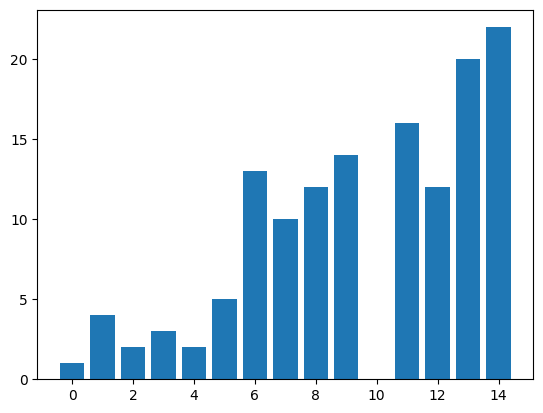

In [146]:
import matplotlib.pyplot as plt
plt.bar(df.index,df['val'])
plt.show()

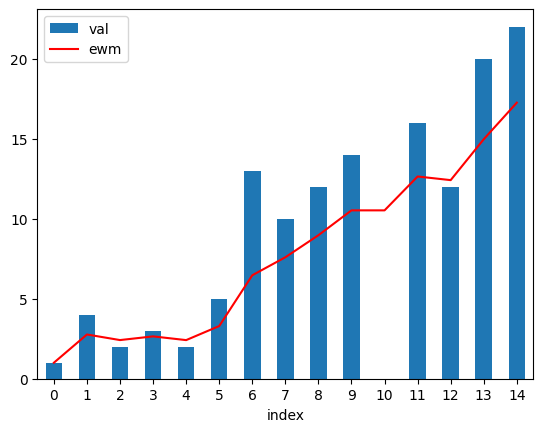

In [147]:
df2 = df.assign(ewm=df['val'].ewm(alpha=0.3).mean())
ax = df.plot(kind='bar',x='index',y='val')
ax2= df2.plot(kind='line',x='index', y='ewm', color='red', ax=ax)
plt.show()